TITANIC SURVIVAL PREDICTION

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load and read 20 rows of the data
dt = pd.read_csv('/workspaces/CODSOFT/tested.csv')
dt.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [3]:
#look into data info
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
# to calculate the total NAN(Not A Number) values in each columns
dt.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
# looking into statistical information of data
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
# filling nan values with mean and applying one hot encoding to sex column
dt.fillna(dt['Fare'].mean(), inplace=True)
dt.fillna(dt['Age'].mean(), inplace=True)
dt['Sex'] = dt['Sex'].map({'female':0,'male':1})
print(dt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    int64  
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Cabin        418 non-null    object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB
None


<Axes: xlabel='Survived', ylabel='Fare'>

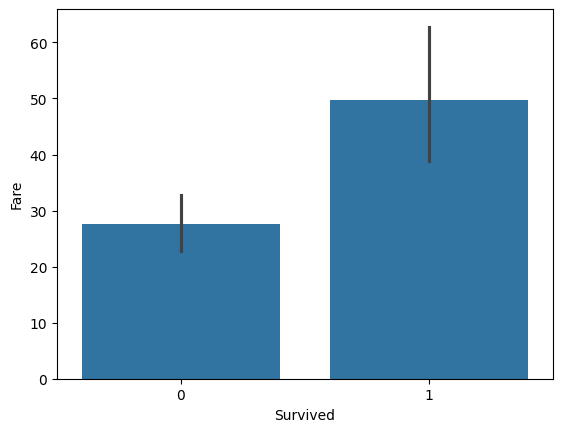

In [7]:
# people surviving on basis of fare
sns.barplot(dt, x= 'Survived', y = 'Fare')

<Axes: xlabel='Survived', ylabel='Age'>

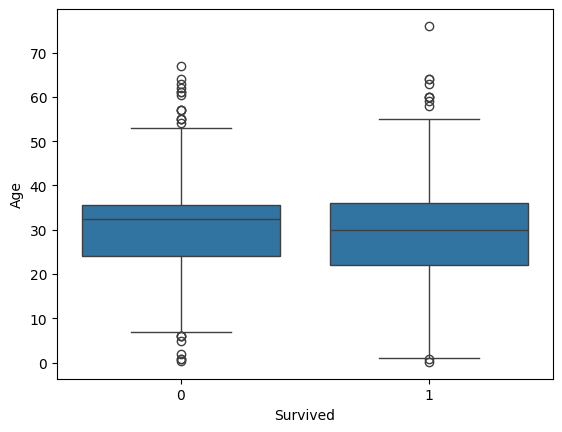

In [8]:
# people surviving on basis of age
sns.boxplot(dt, x= 'Survived', y = 'Age')

<Axes: xlabel='Sex', ylabel='Count'>

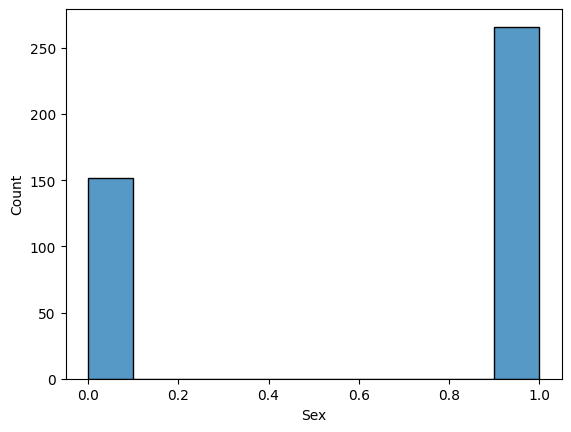

In [9]:
sns.histplot(dt, x = 'Sex')

<Axes: xlabel='SibSp', ylabel='Count'>

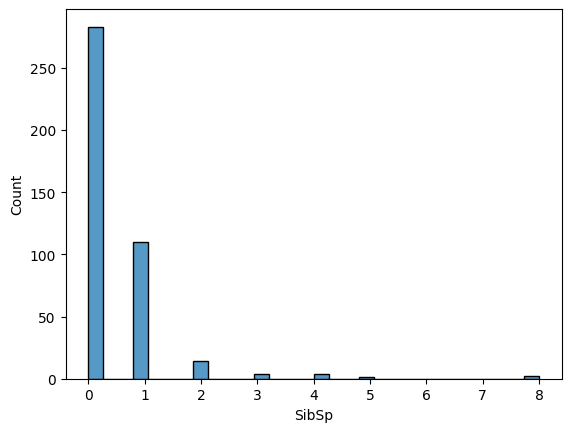

In [10]:
# people surviving on basis of siblings/spouse
sns.histplot(dt, x = 'SibSp')

<Axes: xlabel='Parch', ylabel='Count'>

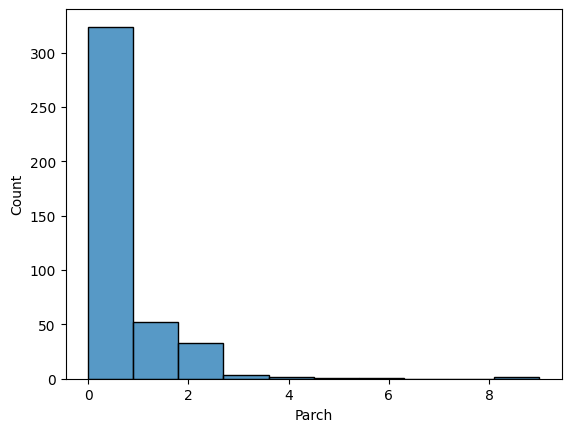

In [11]:
# people surviving on basis of Parents/child
sns.histplot(dt, x = 'Parch')

In [12]:
# coloumn names
dt.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [13]:
# copying data such that original is not affected and selecting columns that are relevent
data = dt[['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Age', 'Fare']].copy(deep= True)
print(data)

     Survived  Pclass  Sex  SibSp  Parch        Age      Fare
0           0       3    1      0      0  34.500000    7.8292
1           1       3    0      1      0  47.000000    7.0000
2           0       2    1      0      0  62.000000    9.6875
3           0       3    1      0      0  27.000000    8.6625
4           1       3    0      1      1  22.000000   12.2875
..        ...     ...  ...    ...    ...        ...       ...
413         0       3    1      0      0  35.627188    8.0500
414         1       1    0      0      0  39.000000  108.9000
415         0       3    1      0      0  38.500000    7.2500
416         0       3    1      0      0  35.627188    8.0500
417         0       3    1      1      1  35.627188   22.3583

[418 rows x 7 columns]


In [14]:
# importing classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [15]:
# importing train test model and loading independent variables to x and dependent variables to y
from sklearn.model_selection import train_test_split
x = data[['Age','Pclass','Fare','Sex','SibSp','Parch']]
y = data['Survived']
# gives frequency of unique values in a column/s to find if data is balanced or imbalanced
data['Survived'].value_counts()
# the ratio is 63%:37%, thus can be considered somewhat balanced


Survived
0    266
1    152
Name: count, dtype: int64

In [16]:
# assigning variables in train test split where test size is 30%
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [17]:
# importing metrics
from sklearn.metrics import confusion_matrix, accuracy_score
# KNeighbhors algorithm where we have kept value of k in a loop to get an optimum value with least misclassified data
missclassified=[]
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    kpred = knn.predict(x_test)
    missclassified.append((y_test != kpred).sum())
print(missclassified)

[36, 41, 37, 37, 43, 40, 42, 41, 42, 42, 45, 42, 44, 43, 45, 46, 45, 45, 46]


In [18]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)
kpred = knn.predict(x_test)
kcm = confusion_matrix(y_test,kpred)
kacc = accuracy_score(y_test,kpred)
print(f'The confusion matrix is:\n{kcm}\nThe accuracy is: {round((kacc*100), 2)}%')

The confusion matrix is:
[[76  9]
 [31 10]]
The accuracy is: 68.25%


In [19]:
# Logistic Regression algorithm
lr = LogisticRegression()
lr.fit(x_train,y_train)
lpred = lr.predict(x_test)
lcm = confusion_matrix(y_test,lpred)
lacc = accuracy_score(y_test,lpred)
print(f'The confusion matrix is:\n{lcm}\nThe accuracy is: {lacc*100}%')

The confusion matrix is:
[[85  0]
 [ 0 41]]
The accuracy is: 100.0%


In [20]:
# Decision Tree algorithm
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dpred = dtc.predict(x_test)
dcm = confusion_matrix(y_test,dpred)
dacc = accuracy_score(y_test,dpred)
print(f'The confusion matrix is:\n{dcm}\nThe accuracy is: {dacc*100}%')

The confusion matrix is:
[[85  0]
 [ 0 41]]
The accuracy is: 100.0%
